# 第4章：形態素解析
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [1]:
#MeCabをインストール
!apt install mecab libmecab-dev mecab-ipadic-utf8
!pip install unidic-lite

#neko.txtをインストール
!wget https://nlp100.github.io/data/neko.txt

#形態素解析
!mecab ./neko.txt -o ./neko.txt.mecab


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 8 newly installed, 0 to remove and 11 not upgraded.
Need to get 29.0 MB of archives.
After this operation, 277 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab-dev amd64 0.996-5 [308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-utils amd64 0.996-5 [4,856 B]
Get:4 http://archive.ubuntu.com/ub

**30. 形態素解析結果の読み込み**\
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [2]:
!head -15 ./neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ


In [3]:
filename = 'neko.txt.mecab'
sentence = []
result = []
with open(filename, 'r') as f:
  for line in f:
    t1 = line.split('\t')
    if len(t1) == 2:
      t2 = t1[1].split(',')
      sentence.append({'surface': t1[0], 'base': t2[6], 'pos': t2[0], 'pos1': t2[1]})
      if t2[1] == '句点':
        result.append(sentence)
        sentence = []

result


[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'},
  {'surface': '', 'base': '*\n', 'pos': '記号', 'pos1': '一般'},
  {'surface': '', 'base': '*\n', 'pos': '記号', 'pos1': '一般'},
  {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
  {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surface': '', 'base': '*\n', 'pos': '記号', 'pos1': '一般'},
  {'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surfa

**31. 動詞**\
動詞の表層形をすべて抽出せよ．

In [4]:
ans = set()

for lis in result:
  for dic in lis:
    if dic['pos'] == '動詞':
      ans.add(dic['surface'])
print(ans)

{'綻びる', 'あか', '頼ま', '自惚れ', 'してやり', 'ゆか', 'ぬっ', '弁じ', '通り過ぎ', '障', '下げ', '明か', '滅す', '呑み', '抓ん', '奢り', 'ほり', '跳ねかす', 'つくし', '近寄り', '送ら', '作ろ', '起き直っ', '見違える', '迷わさ', '申し渡し', 'ととのう', '泣き', '届か', '載っけ', '申し', 'からかわ', '暮れれ', '熾ん', '拗じ', '冷やかし', 'ぬすみ', '取り', '填める', '触る', '沁む', 'くずさ', '潜り', 'ときゃ', 'ほのめい', 'こぼれ落ちる', '列ね', 'しかる', '預っ', '盗ん', 'ざんす', '至ら', 'やん', '構え', '捲か', '溜め', '拵え', '返さ', '行ける', '引きあげる', '包ん', '食べ', '就い', 'らっしゃい', '書き', '逸する', '迂', '折る', '見出す', '忍び', '増し', '丸め', '気づかい', '印せ', 'おい', '問いかけ', '上がる', '暮らし', '交ぜ返し', '飛出', '写せ', '飼わ', '這い出す', '嵌っ', '還す', '落ちる', '下がれ', '助から', '食い切っ', 'もっ', '奏する', '抓み', '引っ繰り返し', 'しつくし', '優っ', 'とりゃ', '剃っ', '遣っ', 'きめ', '立ち返っ', '乗り出す', '撫で', '出掛ける', 'こうっ', '喰っ', '見抜い', '寝転ん', '糺し', '有ん', '呈し', '分りゃ', '代り', '撃ち', '割り出さ', '聞かさ', '戒め', '飛び上がっ', 'ずれ', '繙け', '拭く', 'いらっ', '振っ', '任せ', '活け', '戴い', '廻る', 'つつま', '飛ん', '憤', '垂れる', '知ろ', '較べる', '消そ', '下せる', '乱れ', '過ぎれ', '蒙り', '叩き上げ', '比べる', 'じみ', '知らし', '訴える', '綴っ', 'どく', '飛び込め', '思い出す', '跳ね', '云い', '救っ', '恐れ入ら', 

**32. 動詞の基本形**\
動詞の基本形をすべて抽出せよ．

In [5]:
ans2 = set()

for lis in result:
  for dic in lis:
    if dic['pos'] == '動詞':
      ans2.add(dic['base'])
print(ans2)

{'尽くす', '綻びる', '足す', '息む', 'つかむ', 'しくじる', '服せる', '跳ねかす', '平らげる', '裏返す', '見違える', '立ちすくむ', 'ととのう', '扱ぐ', '縮む', '触る', '填める', '縛する', '沁む', 'こぼれ落ちる', '消え失せる', 'しかる', '侵す', '吸い込む', '糺す', '見つめる', '引きずり出す', '行ける', '引きあげる', '逸する', '見出す', '折る', 'なぐさむ', 'あらう', 'そり返る', '上がる', '這い出す', '己惚れる', '還す', 'あこがれる', '落ちる', '混ぜる', '奏する', '吟じる', 'はねる', '溜まる', 'もうす', '剥ぐ', '乗り出す', '出掛ける', '這出る', '取上げる', '叩き込む', '思い込む', 'あげる', '拭く', '廻る', '垂れる', '詠む', 'あつめる', '較べる', '接す', '下せる', '降す', '飛出る', '生じる', '比べる', '訴える', 'どく', 'とおる', '思い出す', '当てる', 'ぶらさがる', '上がれる', '憤る', 'なやむ', '醒める', 'こめる', 'しいる', '群がる', '飛込む', 'ひるむ', '溯る', '出せる', '備わる', 'くりゃる', '取り扱う', '描き出す', '突っ込む', '凝り固まる', '正す', '蓄える', '置ける', '唱う', '罷る', 'ぶんなぐる', 'おえる', '称える', '突き当る', '歌う', '打殺す', '衝く', '錬る', '乱す', '添う', '敲く', 'さます', '見おろす', '遂げる', '聞き惚れる', '寝つく', '施す', '値する', '役に立つ', '融ける', 'しつくす', '頼む', '疑る', 'くだる', '咽ぶ', '寄こす', '苦しむ', 'かきまぜる', '怖がる', '見立てる', '取り留める', '兼ねる', '蒔く', 'おれる', '交ぜ返す', '見受ける', '噛む', '確かめる', '注す', 'わる', '立ち退く', '開け放す', '剃る', 'かき合せる', 'あ

**33. 「AのB」**\
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [6]:
ans3 = set()

for lis in result:
  for i in range(len(lis) - 2):
    if lis[i]['pos'] == '名詞' and lis[i+1]['surface'] == 'の' and lis[i+2]['pos'] == '名詞':
      ans3.add(lis[i]['surface']+lis[i+1]['surface']+lis[i+2]['surface'])

print(ans3)
len(ans3)

{'柳の虫', '裸体の美人', '例の松', '沙弥の家', 'さのせりふ', '無名氏の作', '裏の池', '時分の僕', '僕の失恋', '女房の鼻', '作家の同類', '場の方面', '時代の羽織', '別の本', '反対の方角', '去年の臭気', '床の間の講釈', '組の生徒', '自分の年', '落葉の時節', '吾輩の心眼', '元来の骨格', '口の周囲', '的のもの', '羽織の紐', 'ただの商売', '屋の牛鍋', 'うちの亭主', '僕の近所', '博多の帯', '親子の間', '吾輩の注意', '椀の底', '化物の考案', '鰹節の一', '戸の右', '主人の冷淡', '溷濁の悲境', '今昔の問題', '男爵の伯父', '家の末流', '逆上の天才', '例の鉄扇', '大金持ちの服装', '不器量の吾輩', '曲線の美', 'あしたの朝', '夜光の明', '私の宿', '芸術の霊気', '戸袋のなか', '小町のよう', '場の横', '主人の心中', '伯の勝手', '何の真似', '以外の戦争', '君の審美', '人の将官', '多くの知己', '自分の義務', '彼の皮膚', '理想のよう', '満足の体', '女学校の生徒', '向の室', '禿頭の音', '胃の中', '例の赤本', '天井の雨', '花川戸の方', '華族の門前', '屈竟の手懸り', '入学の当時', '細君の留守', '山羊のよう', '掃除のため', '満天下の人間', '股のあたり', '人の気', '人間の品', '山の中', '憎悪の念', '参考のため', '近頃の如く', '軍隊の凱旋', 'はずのもの', '一種の寄生虫', '湯の方', '裸のまま', '無粋の数', '君の伯父', '細君の尻', '恐縮の至り', '猫の事', 'こちらの刃', '大将のよう', '両君の写真', '旗本のよう', '気の毒の至り', '色の口', 'ベースボールの事', '人の心配', '頭の裏', '皮のあたり', '王様の所', '最前の倒行', '普通の人間', '蟻の領分', '僕の経験', '猫の議論', '負けん気の化物', '使の趣', '本校の生徒', 'ナポレオンのよう', '太平の空気', '子の何とか', '世

4924

**34. 名詞の連接**\
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [7]:
ans4 = set()
nous = []
for lis in result:
  for dic in lis:
    if dic['pos'] == '名詞':
      nous.append(dic['surface'])
    else:
      if len(nous) > 1:
        ans4.add(''.join(nous))
      nous = []

print(ans4)
len(ans4)

{'金善方', '云えん事', '大概自殺', '刺物', '改良首きり器械', '警視庁刑事巡査吉田虎蔵', '一時非常', '一毛', '浜田平助', '事だい', '今度限り', '空気銃', 'かく事', '御座候', '心中ひそか', '二六時中間断', '張り具合', '二千', '半分妻君', '一回', '幸誰', '失策物語', '丈夫そう', '犯罪者', '九年目', '喰代町', '翌日吾輩', '三羽', '鰹節競争', '言葉ちがい', '金田君自身', 'Savagetea', '門松注目飾り', '手水鉢', '自信家', 'ばかよう', '越智こ', '文芸倶楽部', '脳力', '四時', '郎君独寂寞', '三毛君', '散文的', '反射作用', '東風君新体詩', '吾等猫属', '会津領', '不思議そう', '結婚祝', '事これ', '話最中', '日露戦争時代', '珍報', '考げ', 'それぎり当分', '毎日毎日目', '一手専売', '昔静岡', '理学協会', '折柄', '生存上直接', '擅まま', '器械的', '一体掃除', '烏輩', '六角時計', '立ち按排', '剛情', '美的価値', '書生以外', '教育者', '言語動作', '迷亭君例', '三味線もの', '湯壺', '口髯', '段奉賀上候陳', '時候後れ', 'たいがい常識', '近く足音', 'はかよう', '珍語', '神秘さ', 'まま椽側', '毎日事務', '榊原健吉', '何百遍', '小説家', 'いや日', '天気晴朗', '一工夫', '人間全体', '漸次回復', '間蕎麦湯', '十二人', 'ホホホ口', '一日巴理', '大鷹源吾', '陽春白雪', '一歳', 'まま座', '——容易', '一番地面', '三羽共元', '通り鼻汁', '一則', '漢法医', '四人', '両方共紛失', '二行', '主人家族', 'こん畜生', '何わけ', '賛成員', '二字', '梅花形', '次の', 'その後三十分間', 'なに鼠', '蝉気', '東風子', '態度動作', '沈思熟慮', '二六時中己', '驚ろ', '三倍', '露華', '奇譚', '柔術使', "manyaslip'tw

4457

**35. 単語の出現頻度**\
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [14]:
from collections import Counter

words = []
for lis in result:
  for dic in lis:
    if dic['surface'] != '':
      words.append(dic['surface'])

ans5 = Counter(words)
print(ans5.most_common())


[('の', 9194), ('。', 7486), ('て', 6868), ('、', 6772), ('は', 6420), ('に', 6243), ('を', 6071), ('と', 5508), ('が', 5337), ('た', 3988), ('で', 3806), ('「', 3231), ('」', 3225), ('も', 2479), ('ない', 2390), ('だ', 2363), ('し', 2322), ('から', 2032), ('ある', 1728), ('な', 1613), ('ん', 1568), ('か', 1530), ('いる', 1249), ('事', 1207), ('へ', 1034), ('う', 992), ('する', 992), ('もの', 981), ('君', 973), ('です', 973), ('云う', 937), ('主人', 932), ('よう', 696), ('ね', 683), ('この', 649), ('御', 636), ('ば', 617), ('人', 602), ('その', 576), ('一', 554), ('そう', 546), ('何', 539), ('なる', 531), ('さ', 514), ('よ', 509), ('なら', 483), ('吾輩', 481), ('い', 478), ('ます', 458), ('じゃ', 448), ('…', 433), ('これ', 414), ('\u3000', 411), ('なっ', 404), ('それ', 381), ('来', 364), ('れ', 356), ('見', 350), ('でも', 346), ('時', 345), ('迷亭', 343), ('ませ', 330), ('いい', 320), ('三', 319), ('——', 319), ('まで', 313), ('ところ', 313), ('方', 312), ('二', 303), ('ず', 299), ('上', 294), ('まし', 289), ('寒月', 286), ('顔', 282), ('ぬ', 277), ('先生', 274), ('見る', 273), ('人間', 272),

**36. 頻度上位10語**\
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


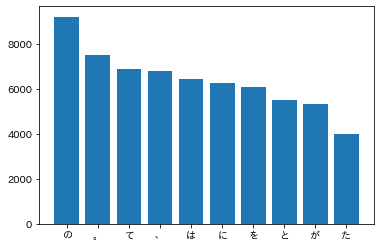

In [26]:
!pip install japanize-matplotlib

import matplotlib.pyplot as plt
import japanize_matplotlib

word, count = zip(*ans5.most_common(10))

fig, ax = plt.subplots()
ax.bar(word, count)
plt.show()

**37. 「猫」と共起頻度の高い上位10語**\
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


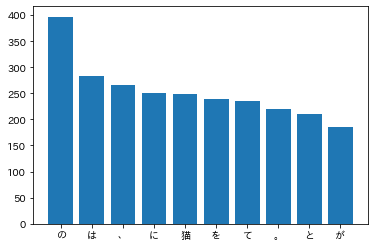

In [28]:
!pip install japanize-matplotlib

import matplotlib.pyplot as plt
import japanize_matplotlib
from collections import Counter

words_cat = []
for lis in result:
  if any(w['surface']=='猫' for w in lis):
    for dic in lis:
        if dic['surface'] != '':
          words_cat.append(dic['surface'])

ans7 = Counter(words_cat)
word, count = zip(*ans7.most_common(10))

fig, ax = plt.subplots()
ax.bar(word, count)
plt.show()


**38. ヒストグラム**\
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

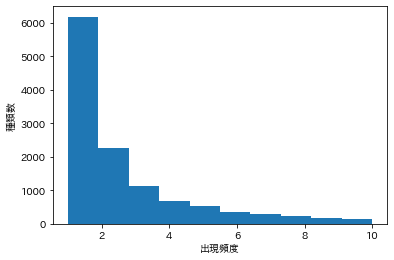

In [39]:
word, count = zip(*ans5.most_common())

fig, ax = plt.subplots()
ax.hist(count, range=(1,10))
ax.set_xlabel('出現頻度')
ax.set_ylabel('種類数')
plt.show() 

**39. Zipfの法則**\
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

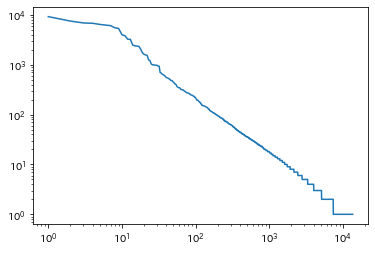

In [40]:
word, count = zip(*ans5.most_common())

y = count
x = [i+1 for i, v in enumerate(count)]
fig, ax = plt.subplots()
ax.plot(x,y)
plt.xscale('log')
plt.yscale('log')
plt.show()